In [1]:
import os
os.chdir('E:\\ai material\\8.NLP\\')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('emails.csv')
data.head(15)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
data.tail(15)

,text,spam
5713,"Subject: promotion vince , i want to congratu...",0
5714,Subject: re : petronas benchmarking visit fyi...,0
5715,Subject: request submitted : access request fo...,0
5716,Subject: * special notification * aurora versi...,0
5717,Subject: fwd : update return - path : receiv...,0
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0


In [5]:
data.shape

(5728, 2)

In [6]:
data.text = data.text.transform(lambda x: x.replace('Subject:', ''))

In [7]:
data.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
tk = TweetTokenizer()
ps = PorterStemmer()
lem = WordNetLemmatizer()

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]',' ',s)
    s = re.sub('\d+',' ',s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]','',s)#
    s = s.replace('co', '')
    s = s.replace('https', '')
    s = s.replace('[\w*]', ' ')
    s = s.lower()
    s = tk.tokenize(s)
    s = [ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
    s = [lem.lemmatize(word) for word in s]
    s = ' '.join(s)
    return s
data['content'] = [cleaning(s) for s in data['text']]

In [12]:
data['content'][1]

'stock trade gunsling fanni merril muzo lza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon ntinuant clothesman libretto chesapeak tight waterway herald hawthorn like chisel morristown superior deoxyribonucl clockwork tri hall incred mcdougal ye hepburn einsteinian earmark sapl boar duan plain palfrey inflex like huzzah pepperoni bedtim nameabl attir tri edt chronographi optimum ye pirogu diffus albeit'

In [13]:
all_words = ' '.join([text for text in data['content']])

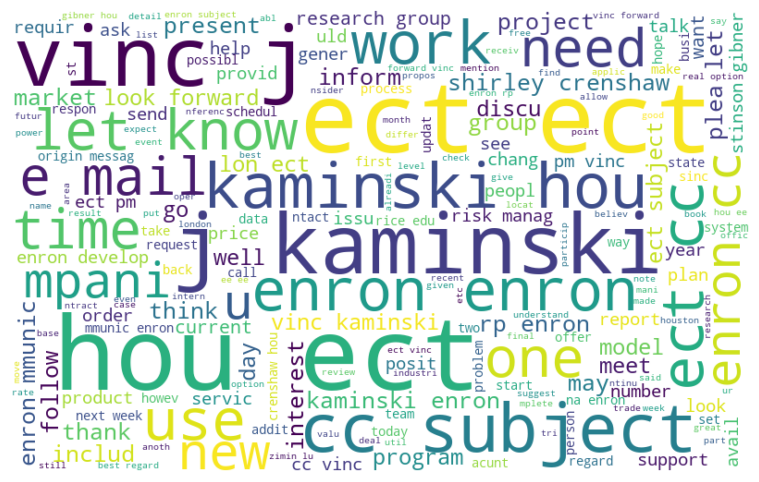

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'white').generate(all_words)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
normal_words = ' '.join([text for text in data['content'][data['spam'] == 0]])

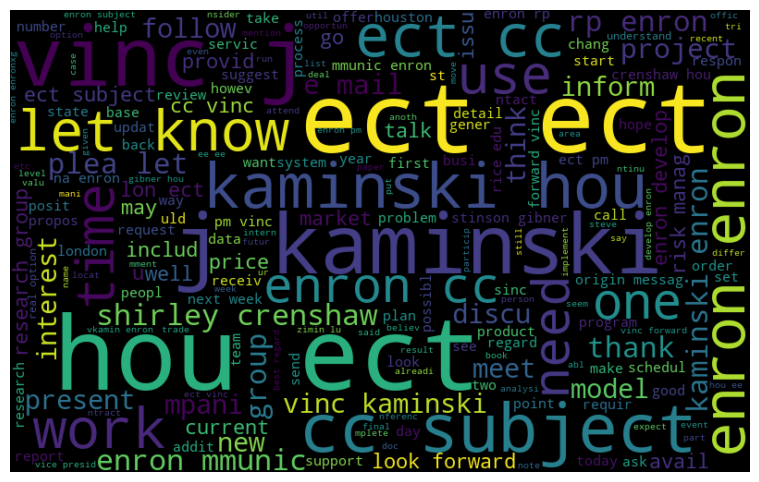

In [16]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'black').generate(normal_words)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
negative_words = ' '.join([text for text in data['content'][data['spam'] == 1]])

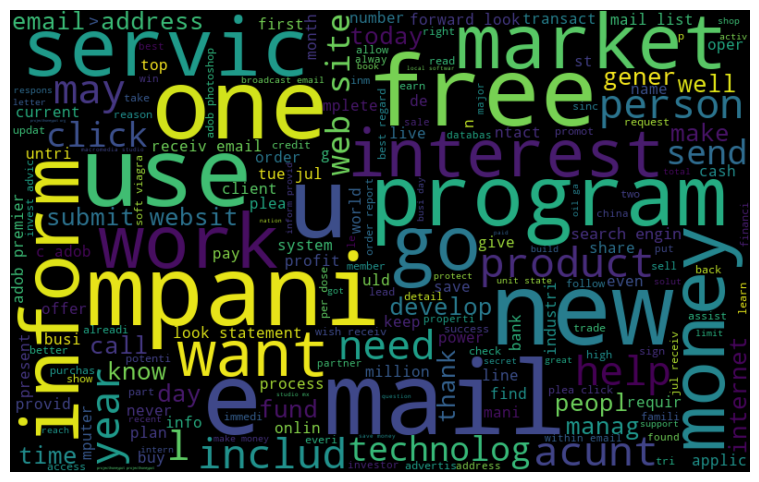

In [18]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'black').generate(negative_words)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [19]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'\w+', i)
        hashtags.append(ht)
    return hashtags

In [20]:
ht_regular = hashtag_extract(data['content'][data['spam']==0])

In [21]:
ht_negative = hashtag_extract(data['content'][data['spam']==1])

In [22]:
ht_regular = sum(ht_regular, [])
ht_negative = sum(ht_negative, [])

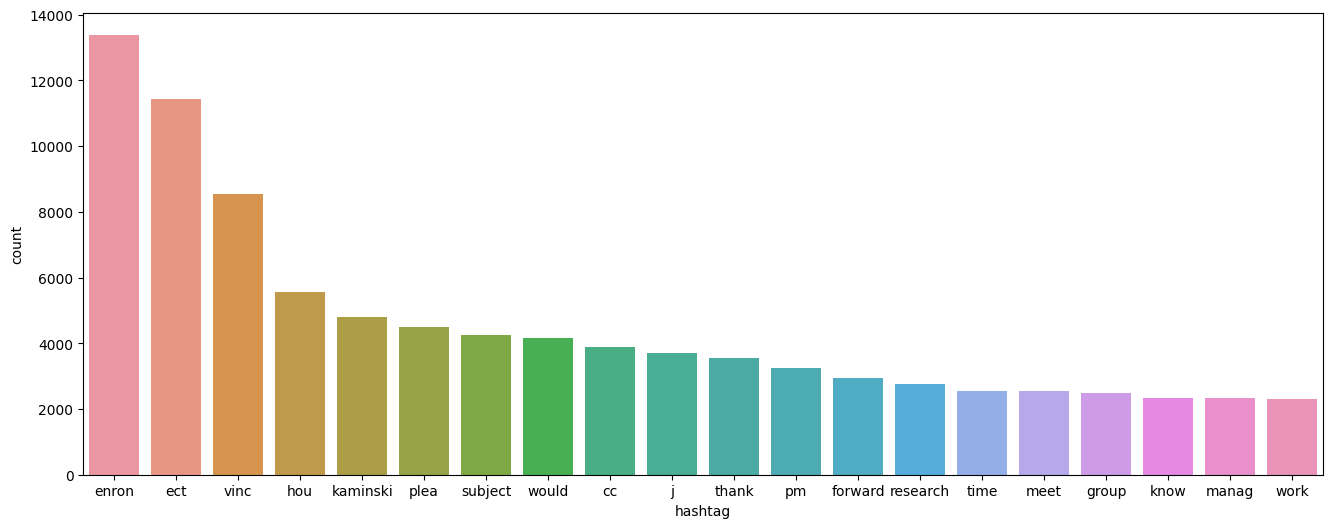

In [26]:
import seaborn as sns

a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'hashtag' : list(a.keys()), 'count': list(a.values())})
d = d.nlargest(columns = 'count', n = 20)
plt.figure(figsize = (16,6))
ax = sns.barplot(data = d, x = 'hashtag', y = 'count')
ax.set(ylabel = 'count')
plt.show()

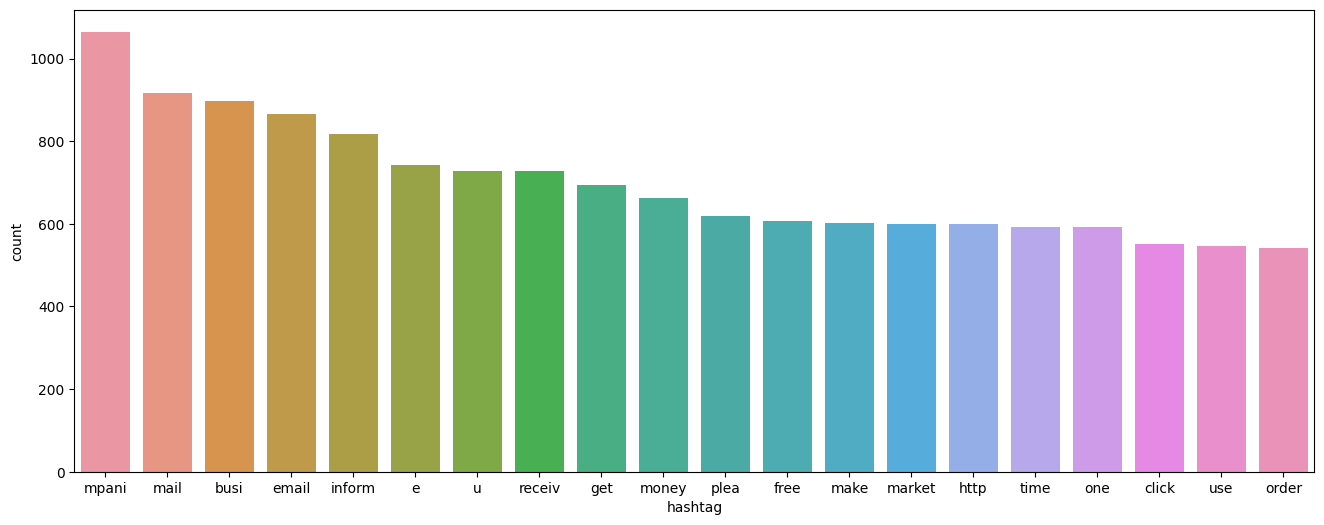

In [28]:
b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'hashtag' : list(b.keys()), 'count': list(b.values())})
e = e.nlargest(columns = 'count', n = 20)
plt.figure(figsize = (16,6))
ax = sns.barplot(data = e, x = 'hashtag', y = 'count')
ax.set(ylabel = 'count')
plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer(ngram_range = (1,1), stop_words = stopwords.words('english')).fit(data['content'])

In [32]:
x = vectorizer.transform(data['content']).toarray()

In [33]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
tran = TfidfTransformer().fit(x)
x = tran.transform(x).toarray()

In [37]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, data.spam.values, test_size = 0.25, random_state = 0)

In [39]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4296, 25403) (1432, 25403) (4296,) (1432,)


# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
log = LogisticRegression()

In [42]:
log.fit(x_train,y_train)

LogisticRegression()

In [43]:
log.score(x_train,y_train)

0.9965083798882681

In [44]:
log.score(x_test,y_test)

0.9741620111731844

In [45]:
y_pred = log.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
y_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [48]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = log.classes_, columns = log.classes_)
cm_df.index.name = 'predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0    1
predicted           
0          1087   35
1             2  308


In [49]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score

ROC AUC: 0.95


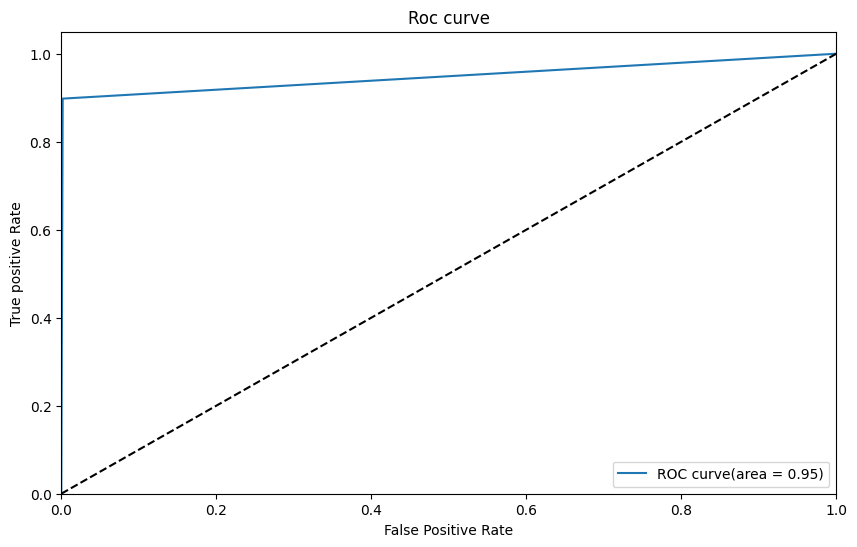

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
plt.figure(figsize = (10,6))
plt.plot(fpr,tpr,label = 'ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Roc curve')
plt.legend(loc = 'lower right')
plt.show()

# Naive bayes 

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [54]:
nb.score(x_train, y_train)

0.9986033519553073

In [55]:
nb.score(x_test, y_test)

0.9587988826815642

In [56]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
y_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = nb.classes_, columns = nb.classes_)
cm_df.index.name = 'predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0    1
predicted           
0          1079   49
1            10  294


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1089
           1       0.97      0.86      0.91       343

    accuracy                           0.96      1432
   macro avg       0.96      0.92      0.94      1432
weighted avg       0.96      0.96      0.96      1432



ROC AUC: 0.92


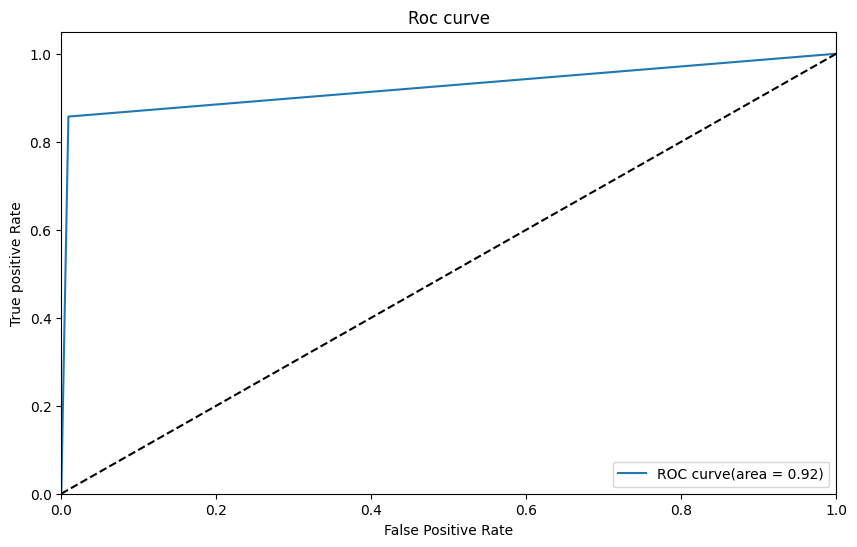

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
plt.figure(figsize = (10,6))
plt.plot(fpr,tpr,label = 'ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Roc curve')
plt.legend(loc = 'lower right')
plt.show()